# **Emotion Classification**
Link video: https://youtu.be/1c6oUDp5ITM?si=fqSjGMr6fN4Yw-P_ <br>
Anggota Kelompok:<br>
1. Gisela Elviany - 2501972120
2. Nayla Anandhita - 2501979726
3. Sherryl Kurniawan - 2540119570



Salah satu media sosial berbasis teks yang populer saat ini adalah X (dulu bernama twitter). Menurut internetlivestats, rata-rata 6,000 tweet diunggah pada setiap detiknya, berarti bahwa ada 500 juta tweet yang dikirim dalam satu hari. Setiap teks yang diunggah mengandung berbagai macam emosi yang dirasakan oleh penulisnya. Walaupun begitu, memahami maksud dari emosi pada suatu teks bukanlah hal yang mudah. Terkadang kita salah memahami emosi dari teks yang ada. Oleh karena itu, penelitian dalam analisis emosi dari teks memiliki potensi aplikasi yang luas dan penting serta perlu dikembangkan metode yang secara otomatis dapat  menganalisis emosi dari suatu teks.

Penelitian ini akan berfokus pada tugas klasifikasi emosi berbasis teks. Teks akan diklasifikasikan ke dalam empat kategori emosi utama, yaitu kemarahan (anger), kebahagiaan (joy), kesedihan (sadness), dan ketakutan (fear). Dengan menggunakan dataset yang diperoleh dari Kaggle, penelitian ini akan menggunakan metode Long Short-Term Memory (LSTM), Decision Tree, dan Random Forest untuk memperoleh model yang secara optimal dapat mengkategorikan emosi dalam teks.

# Read data

In [ ]:
import numpy as np
import pandas as pd
import string

In [ ]:
data_train = pd.read_csv('/content/emotion-labels-train.csv')
data_train

text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @VivienLloyd Thank you so much! Just home - st...  sadness
3609              Just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness
3611  @BluesfestByron second artist announcement loo...  sadness
3612  I can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

data training berjumlah 3613 baris dan 2 kolom

In [ ]:
data_test = pd.read_csv('/content/emotion-labels-test.csv')
data_test

text    label
0     You must be knowing #blithe means (adj.)  Happ...      joy
1     Old saying 'A #smile shared is one gained for ...      joy
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...      joy
3     @Elaminova sparkling water makes your life spa...      joy
4     I'm tired of everybody telling me to chill out...      joy
...                                                 ...      ...
3137          Why does Candice constantly pout #GBBO 💄😒  sadness
3138  @redBus_in #unhappy with #redbus CC, when I ta...  sadness
3139  @AceOperative789 no pull him afew weeks ago, s...  sadness
3140  I'm buying art supplies and I'm debating how s...  sadness
3141  @sainsburys Could you ask your Chafford Hundre...  sadness

[3142 rows x 2 columns]

data testing berjumlah 3142 baris dan 2 kolom

# Exploratory Data Analysis

Tahapan dalam proses analisis klasifikasi berbasis teks diawali dengan EDA (Explanatory Data Analysis). EDA adalah proses awal dalam tahapan analisis untuk mengetahui karakteristik utama dalam dataset sebelum melakukan permodelan yang sesuai. EDA bertujuan untuk memahami dataset secara mendalam serta distribusinya, pengambilan keputusan model terbaik, mengurangi risiko kesalahan dalam analisis, dan menangani missing value ataupun outlier.

In [ ]:
# check the unique values
data_train['label'].unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [ ]:
data_test['label'].unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

Tahapan EDA yang pertama dalam analisis ini, dengan melakukan pengecekan nilai unik dalam data. Dalam hal ini nilai unik dalam data training dan data testing terdiri atas empat kategori utama berdasarkan kolom “label” untuk klasifikasi emosi, yaitu sadness, joy, anger, dan fear. Pengecekan nilai unik dalam data dilakukan untuk memastikan bahwa semua label atau kategori ada dalam dataset dan mengetahui cakupan kategori dalam dataset yang selanjutnya digunakan untuk mengetahui distribusi data berdasarkan plot ataupun grafik.

In [ ]:
# Get the count of each unique label
data_train['label'].value_counts()

label
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64

In [ ]:
data_test['label'].value_counts()

label
fear       995
anger      760
joy        714
sadness    673
Name: count, dtype: int64

Setelah mengetahui kategori apa saja yang terdapat dalam dataset, proses EDA ini dilanjutkan dengan mengetahui distribusi apa saja dalam dataset, baik dalam data training maupun dalam data testing berdasarkan nilai unik. Dalam data training, nilai unik terdiri atas “fear” berjumlah 1147 data, “anger” berjumlah 857 data, “joy” berjumlah 823 data, dan “sadness” berjumlah 786 data, sedangkan pada data testing, nilai unik terdiri atas “fear” berjumlah 995 data, “anger” berjumlah 760 data, “joy” berjumlah 714 data, dan “sadness” berjumlah 673 data.

In [ ]:
data_train = data_train.dropna()
data_train.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
data_test = data_test.dropna()
data_test.isna().sum()

text     0
label    0
dtype: int64

Setelah mengetahui penyebaran data training dan data testing, selanjutkan dilakukan pengecekan missing value untuk memastikan bahwa tidak ada nilai yang hilang atau kosong dalam dataset. Hal ini bertujuan untuk mencegah terjadinya error dalam proses analisis klasifikasi selanjutnya. Dalam dataset, baik pada data training dan data testing tidak terdapat nilai yang hilang sehingga tidak perlu penanganan lebih lanjut dalam mengatasi nilai hilang.

# Text Preprocessing

Tahapan dalam proses analisis klasifikasi berbasis teks selanjutnya adalah preprocessing. Text preprocesisng dilakukan untuk menyiapkan data mentah menjadi data yang dapat diolah lebih lanjut. Text preprocessing meliputi case folding, cleaning, dan filtering. Tahapan dalam text preprocessing ini biasanya dilakukan dengan tujuan agar meningkatkan keterbacaan dalam data, mengurangi kata-kata yang tidak diperlukan dalam analisis, meningkatkan akurasi, dan meningkatkan kualitas dari data.

## Case Folding

Case folding dilakukan untuk standarisasi teks. Dalam hal ini, pada dataset, tidak semua kalimat memiliki sturktur kapitalisasi yang sama, masih terdapat huruf besar dan huruf kecil, sehingga dalam case folding dilakukan pengubahan struktur kapitalisasi kalimat agar setiap struktur kalimat memiliki kesamaan yaitu menggunakan huruf kecil dalam struktur kalimatnya.

In [ ]:
df = data_train.copy()

In [ ]:
df['label'] = df['label'].str.lower()
df

text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @VivienLloyd Thank you so much! Just home - st...  sadness
3609              Just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness
3611  @BluesfestByron second artist announcement loo...  sadness
3612  I can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

In [ ]:
def casefold_if_str(text):
    if isinstance(text, str):
        return text.casefold()
    else:
        return text

df['text'] = df['text'].apply(casefold_if_str)

df

text    label
0     just got back from seeing @garydelaney in burs...      joy
1     oh dear an evening of absolute hilarity i don'...      joy
2     been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : thank you so much, gloria! yo...      joy
4     i feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @vivienlloyd thank you so much! just home - st...  sadness
3609              just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @silkinside @tommyjoeratliff that's so pretty!...  sadness
3611  @bluesfestbyron second artist announcement loo...  sadness
3612  i can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

## Cleaning

Setelah memastikan bahwa struktur kapitalisasi dalam kalimat sudah huruf kecil semua dengan case folding, selanjutnya dilakukan cleansing pada setiap kalimat dalam data. Dalam dataset ini, masih terdapat beberapa elemen yang tidak diinginkan, seperti: <br>
-	Terdapat simbol karakter  <br>
-	Terdapat tanda baca <br>
-	Terdapat simbol emoji dan stiker  <br>
-	Terdapat angka <br>

Dikarenakan dalam dataset tersebut masih terdapat elemen yang tidak diinginkan, maka analisis ini memerlukan proses cleaning untuk menghilangkan elemen tersebut. Tahapan cleansing sangat diperlukan dalam proses analisis ini agar menghindari risiko error atau ketidaktepatan dalam penentuan model serta hasil akurasinya.


### Removing number

Karena keberadaan angka dan nilainya tidak digunakan dalam analisis ini, kami akan menghapus semua angka dalam dataset.

In [ ]:
df['text'] = df['text'].replace(r'\b\d+\b', '', regex=True)
df

text    label
0     just got back from seeing @garydelaney in burs...      joy
1     oh dear an evening of absolute hilarity i don'...      joy
2     been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : thank you so much, gloria! yo...      joy
4     i feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @vivienlloyd thank you so much! just home - st...  sadness
3609              just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @silkinside @tommyjoeratliff that's so pretty!...  sadness
3611  @bluesfestbyron second artist announcement loo...  sadness
3612  i can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

### Removing symbol and punctuation

Simbol dan tanda baca tidak relevan dalam analisis ini dan harus dihapus dari kumpulan data.

In [ ]:
punctuation = '[' + string.punctuation + ']'
df['text'] = df['text'].replace(punctuation, ' ', regex=True)
df

text    label
0     just got back from seeing  garydelaney in burs...      joy
1     oh dear an evening of absolute hilarity i don ...      joy
2     been waiting all week for this game ❤️❤️❤️  ch...      joy
3      gardiner love   thank you so much  gloria  yo...      joy
4     i feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608   vivienlloyd thank you so much  just home   st...  sadness
3609              just put the winter duvet on ☃️❄️🌬☔️   sadness
3610   silkinside  tommyjoeratliff that s so pretty ...  sadness
3611   bluesfestbyron second artist announcement loo...  sadness
3612  i can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

In [ ]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["                     # Begin character set
        "\U0001F600-\U0001F64F" # Emoticons
        "\U0001F300-\U0001F5FF" # Miscellaneous Symbols and Pictographs
        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
        "\U0001F1E0-\U0001F1FF" # Flags (iOS)
        "\U00002702-\U000027B0" # Dingbats
        "\U000024C2-\U0001F251" # Enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_emojis)

# Display the DataFrame
df

text    label
0     just got back from seeing  garydelaney in burs...      joy
1     oh dear an evening of absolute hilarity i don ...      joy
2     been waiting all week for this game   cheer  f...      joy
3      gardiner love   thank you so much  gloria  yo...      joy
4     i feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608   vivienlloyd thank you so much  just home   st...  sadness
3609                     just put the winter duvet on    sadness
3610   silkinside  tommyjoeratliff that s so pretty ...  sadness
3611   bluesfestbyron second artist announcement loo...  sadness
3612  i can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

Sekarang, semua karakter non-string telah dihapus.

### Remove double white space

Angka, simbol, dan tanda baca yang dihapus tadi diganti dengan white space. Jadi, pada langkah ini kita akan menghapus semua spasi yang berjumlah lebih dari satu

In [ ]:
df['text'] = df['text'].str.replace(r'\s{2,}', ' ', regex=True)
df

text    label
0     just got back from seeing garydelaney in bursl...      joy
1     oh dear an evening of absolute hilarity i don ...      joy
2     been waiting all week for this game cheer friday       joy
3      gardiner love thank you so much gloria you re...      joy
4     i feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608   vivienlloyd thank you so much just home stunn...  sadness
3609                      just put the winter duvet on   sadness
3610   silkinside tommyjoeratliff that s so pretty i...  sadness
3611   bluesfestbyron second artist announcement loo...  sadness
3612  i can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

## Filtering

Setelah proses cleaning selesai dilakukan, untuk teknik preprocessing data selanjutnya adalah filtering. Filtering dapat berupa menghilangkan stopword di dalam data. Stopword biasanya berisi kata yang sering muncul dan tidak penting dalam sebuah kalimat, sehingga untuk membersihkan duplikasi kata dalam teks, analisis ini melakukan filtering untuk menghapus kata tersebut.

### Remove Stopwords

Stopword adalah kata-kata yang biasanya muncul. Beberapa contoh stopword adalah 'dan', 'lalu', 'jadi', dll. Kata-kata ini dihilangkan karena tidak penting dan tidak memiliki konteks apa pun.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
sw_en = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in sw_en]))
df

text    label
0     got back seeing garydelaney burslem amazing fa...      joy
1     oh dear evening absolute hilarity think laughe...      joy
2                        waiting week game cheer friday      joy
3     gardiner love thank much gloria sweet thoughtf...      joy
4     feel blessed work family nanny nothing love am...      joy
...                                                 ...      ...
3608  vivienlloyd thank much home stunned happy thin...  sadness
3609                                   put winter duvet  sadness
3610  silkinside tommyjoeratliff pretty love sky bac...  sadness
3611  bluesfestbyron second artist announcement look...  sadness
3612  literally eat creamy pesto pasta topped grille...  sadness

[3613 rows x 2 columns]

## Clean train dataset

In [ ]:
# Before preprocessing
data_train

text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
3608  @VivienLloyd Thank you so much! Just home - st...  sadness
3609              Just put the winter duvet on ☃️❄️🌬☔️   sadness
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness
3611  @BluesfestByron second artist announcement loo...  sadness
3612  I can literally eat creamy pesto pasta topped ...  sadness

[3613 rows x 2 columns]

In [ ]:
# After preprocessing
clean_train = pd.merge(data_train['text'], df, left_index=True, right_index=True, how='inner')
clean_train

text_x  \
0     Just got back from seeing @GaryDelaney in Burs...   
1     Oh dear an evening of absolute hilarity I don'...   
2     Been waiting all week for this game ❤️❤️❤️ #ch...   
3     @gardiner_love : Thank you so much, Gloria! Yo...   
4     I feel so blessed to work with the family that...   
...                                                 ...   
3608  @VivienLloyd Thank you so much! Just home - st...   
3609              Just put the winter duvet on ☃️❄️🌬☔️    
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...   
3611  @BluesfestByron second artist announcement loo...   
3612  I can literally eat creamy pesto pasta topped ...   

                                                 text_y    label  
0     got back seeing garydelaney burslem amazing fa...      joy  
1     oh dear evening absolute hilarity think laughe...      joy  
2                        waiting week game cheer friday      joy  
3     gardiner love thank much gloria sweet thoughtf...      joy  
4     feel blessed work family nanny nothing love am...      joy  
...                                                 ...      ...  
3608  vivienlloyd thank much home stunned happy thin...  sadness  
3609                                   put winter duvet  sadness  
3610  silkinside tommyjoeratliff pretty love sky bac...  sadness  
3611  bluesfestbyron second artist announcement look...  sadness  
3612  literally eat creamy pesto pasta topped grille...  sadness  

[3613 rows x 3 columns]

In [ ]:
# Final dataset
df_train = clean_train.rename(columns={'text_x': 'text', 'text_y': 'clean_text'})
df_train

text  \
0     Just got back from seeing @GaryDelaney in Burs...   
1     Oh dear an evening of absolute hilarity I don'...   
2     Been waiting all week for this game ❤️❤️❤️ #ch...   
3     @gardiner_love : Thank you so much, Gloria! Yo...   
4     I feel so blessed to work with the family that...   
...                                                 ...   
3608  @VivienLloyd Thank you so much! Just home - st...   
3609              Just put the winter duvet on ☃️❄️🌬☔️    
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...   
3611  @BluesfestByron second artist announcement loo...   
3612  I can literally eat creamy pesto pasta topped ...   

                                             clean_text    label  
0     got back seeing garydelaney burslem amazing fa...      joy  
1     oh dear evening absolute hilarity think laughe...      joy  
2                        waiting week game cheer friday      joy  
3     gardiner love thank much gloria sweet thoughtf...      joy  
4     feel blessed work family nanny nothing love am...      joy  
...                                                 ...      ...  
3608  vivienlloyd thank much home stunned happy thin...  sadness  
3609                                   put winter duvet  sadness  
3610  silkinside tommyjoeratliff pretty love sky bac...  sadness  
3611  bluesfestbyron second artist announcement look...  sadness  
3612  literally eat creamy pesto pasta topped grille...  sadness  

[3613 rows x 3 columns]

In [ ]:
#check maximum length of word in sentence
max_sen = df_train['clean_text'].str.split().str.len().max()
max_sen

21

## Preprocessing : test data

Selanjutnya, akan dilakukan preprocessing yang sama pada data testing.

In [ ]:
data_test

text    label
0     You must be knowing #blithe means (adj.)  Happ...      joy
1     Old saying 'A #smile shared is one gained for ...      joy
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...      joy
3     @Elaminova sparkling water makes your life spa...      joy
4     I'm tired of everybody telling me to chill out...      joy
...                                                 ...      ...
3137          Why does Candice constantly pout #GBBO 💄😒  sadness
3138  @redBus_in #unhappy with #redbus CC, when I ta...  sadness
3139  @AceOperative789 no pull him afew weeks ago, s...  sadness
3140  I'm buying art supplies and I'm debating how s...  sadness
3141  @sainsburys Could you ask your Chafford Hundre...  sadness

[3142 rows x 2 columns]

### Case Folding

In [ ]:
dftest = data_test.copy()
dftest['label'] = dftest['label'].str.lower()
def casefold_if_str(text):
    if isinstance(text, str):
        return text.casefold()
    else:
        return text

dftest['text'] = dftest['text'].apply(casefold_if_str)
dftest

text    label
0     you must be knowing #blithe means (adj.)  happ...      joy
1     old saying 'a #smile shared is one gained for ...      joy
2     bridget jones' baby was bloody hilarious 😅 #br...      joy
3     @elaminova sparkling water makes your life spa...      joy
4     i'm tired of everybody telling me to chill out...      joy
...                                                 ...      ...
3137          why does candice constantly pout #gbbo 💄😒  sadness
3138  @redbus_in #unhappy with #redbus cc, when i ta...  sadness
3139  @aceoperative789 no pull him afew weeks ago, s...  sadness
3140  i'm buying art supplies and i'm debating how s...  sadness
3141  @sainsburys could you ask your chafford hundre...  sadness

[3142 rows x 2 columns]

### Cleaning (Remove number, punctuation, symbol, and white space)

In [ ]:
#removing number
dftest['text'] = dftest['text'].replace(r'\b\d+\b', '', regex=True)

#removing punctuation
punctuation = '[' + string.punctuation + ']'
dftest['text'] = dftest['text'].replace(punctuation, ' ', regex=True)

#removing symbol
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["                     # Begin character set
        "\U0001F600-\U0001F64F" # Emoticons
        "\U0001F300-\U0001F5FF" # Miscellaneous Symbols and Pictographs
        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
        "\U0001F1E0-\U0001F1FF" # Flags (iOS)
        "\U00002702-\U000027B0" # Dingbats
        "\U000024C2-\U0001F251" # Enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'text' column
dftest['text'] = dftest['text'].apply(remove_emojis)

#remove double white space
dftest['text'] = dftest['text'].str.replace(r'\s{2,}', ' ', regex=True)

dftest

text    label
0     you must be knowing blithe means adj happy che...      joy
1     old saying a smile shared is one gained for an...      joy
2     bridget jones baby was bloody hilarious bridge...      joy
3      elaminova sparkling water makes your life spa...      joy
4     i m tired of everybody telling me to chill out...      joy
...                                                 ...      ...
3137             why does candice constantly pout gbbo   sadness
3138   redbus in unhappy with redbus cc when i talke...  sadness
3139   aceoperative789 no pull him afew weeks ago sa...  sadness
3140  i m buying art supplies and i m debating how s...  sadness
3141   sainsburys could you ask your chafford hundre...  sadness

[3142 rows x 2 columns]

### Filtering (remove stopword)

In [ ]:
sw_en = set(stopwords.words('english'))
dftest['text'] = dftest['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in sw_en]))
dftest

text    label
0          must knowing blithe means adj happy cheerful      joy
1     old saying smile shared one gained another day...      joy
2     bridget jones baby bloody hilarious bridgetjon...      joy
3          elaminova sparkling water makes life sparkly      joy
4     tired everybody telling chill everythings ok f...      joy
...                                                 ...      ...
3137                       candice constantly pout gbbo  sadness
3138  redbus unhappy redbus cc talked week still ini...  sadness
3139  aceoperative789 pull afew weeks ago sadly ther...  sadness
3140  buying art supplies debating serious buy acryl...  sadness
3141  sainsburys could ask chafford hundred store tu...  sadness

[3142 rows x 2 columns]

#### Results

In [ ]:
clean_test = pd.merge(data_test['text'], dftest, left_index=True, right_index=True, how='inner')
clean_test

text_x  \
0     You must be knowing #blithe means (adj.)  Happ...   
1     Old saying 'A #smile shared is one gained for ...   
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...   
3     @Elaminova sparkling water makes your life spa...   
4     I'm tired of everybody telling me to chill out...   
...                                                 ...   
3137          Why does Candice constantly pout #GBBO 💄😒   
3138  @redBus_in #unhappy with #redbus CC, when I ta...   
3139  @AceOperative789 no pull him afew weeks ago, s...   
3140  I'm buying art supplies and I'm debating how s...   
3141  @sainsburys Could you ask your Chafford Hundre...   

                                                 text_y    label  
0          must knowing blithe means adj happy cheerful      joy  
1     old saying smile shared one gained another day...      joy  
2     bridget jones baby bloody hilarious bridgetjon...      joy  
3          elaminova sparkling water makes life sparkly      joy  
4     tired everybody telling chill everythings ok f...      joy  
...                                                 ...      ...  
3137                       candice constantly pout gbbo  sadness  
3138  redbus unhappy redbus cc talked week still ini...  sadness  
3139  aceoperative789 pull afew weeks ago sadly ther...  sadness  
3140  buying art supplies debating serious buy acryl...  sadness  
3141  sainsburys could ask chafford hundred store tu...  sadness  

[3142 rows x 3 columns]

In [ ]:
df_test = clean_test.rename(columns={'text_x': 'text', 'text_y': 'clean_text'})
df_test

text  \
0     You must be knowing #blithe means (adj.)  Happ...   
1     Old saying 'A #smile shared is one gained for ...   
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...   
3     @Elaminova sparkling water makes your life spa...   
4     I'm tired of everybody telling me to chill out...   
...                                                 ...   
3137          Why does Candice constantly pout #GBBO 💄😒   
3138  @redBus_in #unhappy with #redbus CC, when I ta...   
3139  @AceOperative789 no pull him afew weeks ago, s...   
3140  I'm buying art supplies and I'm debating how s...   
3141  @sainsburys Could you ask your Chafford Hundre...   

                                             clean_text    label  
0          must knowing blithe means adj happy cheerful      joy  
1     old saying smile shared one gained another day...      joy  
2     bridget jones baby bloody hilarious bridgetjon...      joy  
3          elaminova sparkling water makes life sparkly      joy  
4     tired everybody telling chill everythings ok f...      joy  
...                                                 ...      ...  
3137                       candice constantly pout gbbo  sadness  
3138  redbus unhappy redbus cc talked week still ini...  sadness  
3139  aceoperative789 pull afew weeks ago sadly ther...  sadness  
3140  buying art supplies debating serious buy acryl...  sadness  
3141  sainsburys could ask chafford hundred store tu...  sadness  

[3142 rows x 3 columns]

## Word cloud

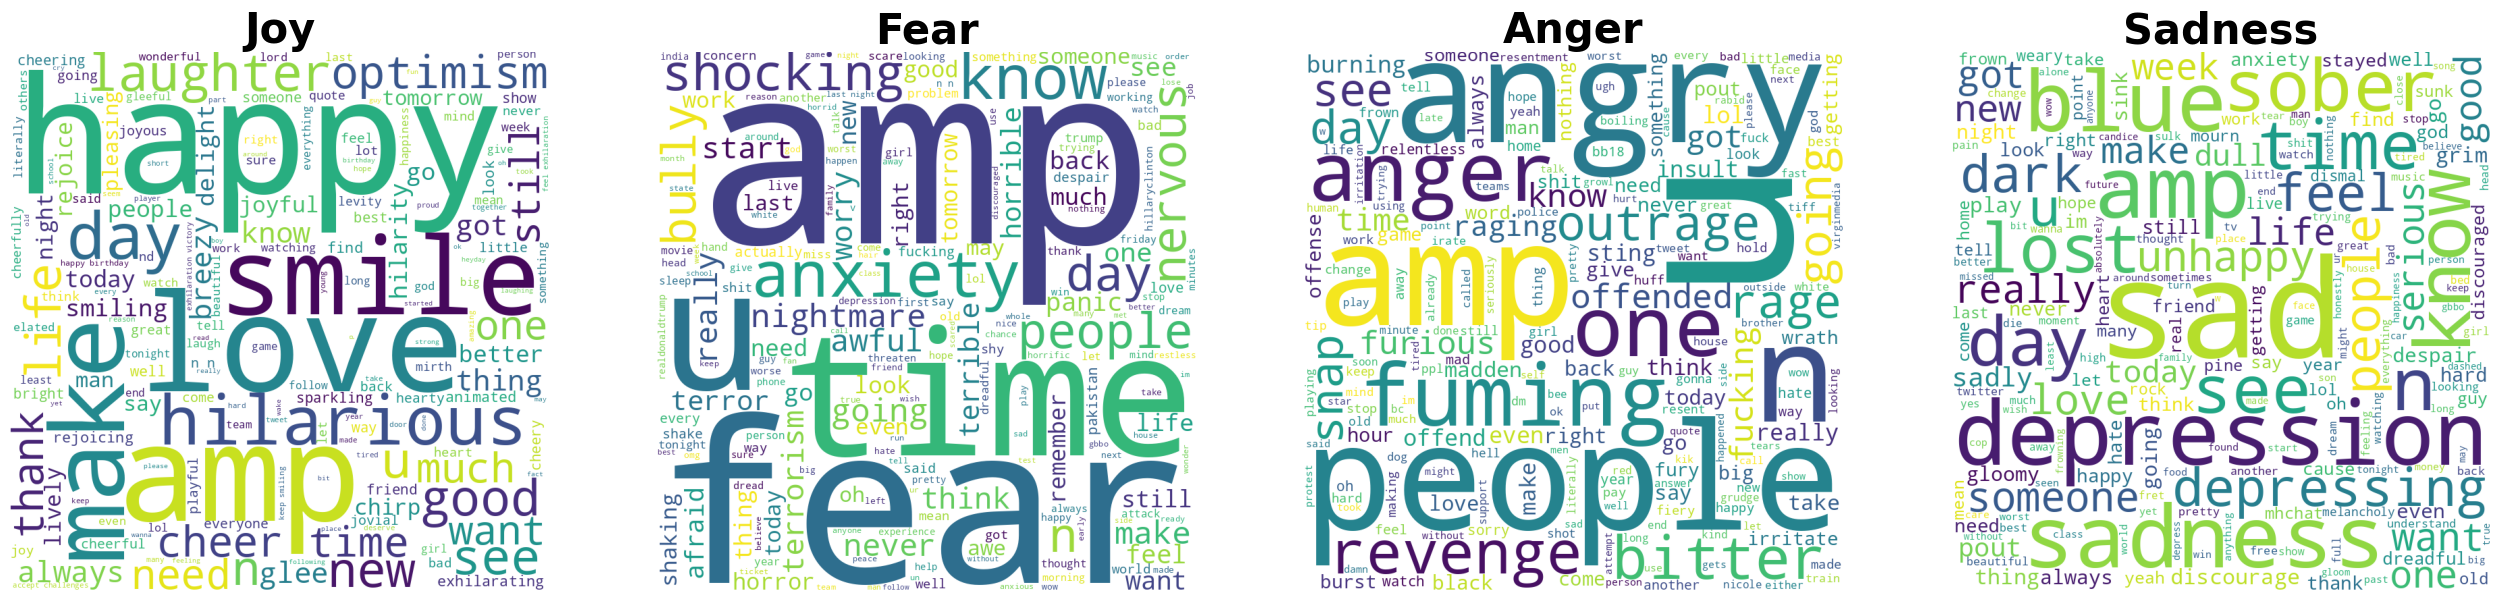

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Separate text based on labels
joy_content = " ".join(df_test[df_test['label'] == 'joy']['clean_text'].astype(str))
fear_content = " ".join(df_test[df_test['label'] == 'fear']['clean_text'].astype(str))
anger_content = " ".join(df_test[df_test['label'] == 'anger']['clean_text'].astype(str))
sadness_content = " ".join(df_test[df_test['label'] == 'sadness']['clean_text'].astype(str))

# Ensure there's content for each category
contents = [joy_content, fear_content, anger_content, sadness_content]

# Generate word clouds
fig, axs = plt.subplots(1, 4, figsize=(32, 16), facecolor=None)

for idx, (content, label) in enumerate(zip(contents, ['Joy', 'Fear', 'Anger', 'Sadness'])):
    if content.strip():  # Check if content is not empty after stripping whitespace
        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10).generate(content)
        axs[idx].imshow(wordcloud)
        axs[idx].set_title(label, fontweight="bold", size=30)
        axs[idx].axis("off")
    else:
        print(f"No valid content for {label} word cloud")

plt.show()

## Tokenization

Setelah tahapan proses cleaning dan filtering selesai, selanjutkan tahapan terakhir dalam preprocessing data yaitu tokenisasi. Tokenisasi adalah proses pemecahan kalimat menjadi kata-kata individual atau biasa disebut sebagai token. Tujuan dari tokenisasi untuk memudahkan dalam melakukan analisis karena dengan memecah kalimat menjadi struktur yang lebih kecil dan mempermudahkan dalam memanipulasi teks dalam tahapan teks representation.

In [ ]:
# Encode target variables
label_dict = {'fear': 0, 'anger': 1, 'joy': 2, 'sadness': 3}
df_train.replace({'label': label_dict}, inplace = True)
df_train

text  \
0     Just got back from seeing @GaryDelaney in Burs...   
1     Oh dear an evening of absolute hilarity I don'...   
2     Been waiting all week for this game ❤️❤️❤️ #ch...   
3     @gardiner_love : Thank you so much, Gloria! Yo...   
4     I feel so blessed to work with the family that...   
...                                                 ...   
3608  @VivienLloyd Thank you so much! Just home - st...   
3609              Just put the winter duvet on ☃️❄️🌬☔️    
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...   
3611  @BluesfestByron second artist announcement loo...   
3612  I can literally eat creamy pesto pasta topped ...   

                                             clean_text  label  
0     got back seeing garydelaney burslem amazing fa...      2  
1     oh dear evening absolute hilarity think laughe...      2  
2                        waiting week game cheer friday      2  
3     gardiner love thank much gloria sweet thoughtf...      2  
4     feel blessed work family nanny nothing love am...      2  
...                                                 ...    ...  
3608  vivienlloyd thank much home stunned happy thin...      3  
3609                                   put winter duvet      3  
3610  silkinside tommyjoeratliff pretty love sky bac...      3  
3611  bluesfestbyron second artist announcement look...      3  
3612  literally eat creamy pesto pasta topped grille...      3  

[3613 rows x 3 columns]

In [ ]:
x_train = df_train['clean_text']
x_train

0       got back seeing garydelaney burslem amazing fa...
1       oh dear evening absolute hilarity think laughe...
2                          waiting week game cheer friday
3       gardiner love thank much gloria sweet thoughtf...
4       feel blessed work family nanny nothing love am...
                              ...                        
3608    vivienlloyd thank much home stunned happy thin...
3609                                     put winter duvet
3610    silkinside tommyjoeratliff pretty love sky bac...
3611    bluesfestbyron second artist announcement look...
3612    literally eat creamy pesto pasta topped grille...
Name: clean_text, Length: 3613, dtype: object

In [ ]:
y_train = df_train['label']
y_train

0       2
1       2
2       2
3       2
4       2
       ..
3608    3
3609    3
3610    3
3611    3
3612    3
Name: label, Length: 3613, dtype: int64

Sekarang kita sudah memiliki x_train dan y_train dan akan melanjutkan ke proses tokenisasi.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
x_train_token =[word_tokenize(i) for i in x_train]
x_train_token

[['got',
  'back',
  'seeing',
  'garydelaney',
  'burslem',
  'amazing',
  'face',
  'still',
  'hurts',
  'laughing',
  'much',
  'hilarious'],
 ['oh',
  'dear',
  'evening',
  'absolute',
  'hilarity',
  'think',
  'laughed',
  'much',
  'long',
  'time'],
 ['waiting', 'week', 'game', 'cheer', 'friday'],
 ['gardiner',
  'love',
  'thank',
  'much',
  'gloria',
  'sweet',
  'thoughtful',
  'made',
  'day',
  'joyful',
  'love'],
 ['feel',
  'blessed',
  'work',
  'family',
  'nanny',
  'nothing',
  'love',
  'amp',
  'appreciation',
  'makes',
  'smile'],
 ['today', 'reached', 'subscribers', 'yt', 'goodday', 'thankful'],
 ['singaholic121',
  'good',
  'morning',
  'love',
  'happy',
  'first',
  'day',
  'fall',
  'let',
  'make',
  'awesome',
  'autumnmemories',
  'annabailey',
  'laughter',
  'smile'],
 ['bridgetjonesbaby',
  'best',
  'thing',
  'seen',
  'ages',
  'funny',
  'missed',
  'bridget',
  'love',
  'teammark'],
 ['got',
  'back',
  'seeing',
  'garydelaney',
  'burslem

In [ ]:
len(x_train_token)

3613

Sekarang kita akan melakukan tokenisasi, encode, dan tokenisasi pada data testing.

In [ ]:
# Encode target variables
label_dict = {'fear': 0, 'anger': 1, 'joy': 2, 'sadness': 3}
df_test.replace({'label': label_dict}, inplace = True)
df_test

text  \
0     You must be knowing #blithe means (adj.)  Happ...   
1     Old saying 'A #smile shared is one gained for ...   
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...   
3     @Elaminova sparkling water makes your life spa...   
4     I'm tired of everybody telling me to chill out...   
...                                                 ...   
3137          Why does Candice constantly pout #GBBO 💄😒   
3138  @redBus_in #unhappy with #redbus CC, when I ta...   
3139  @AceOperative789 no pull him afew weeks ago, s...   
3140  I'm buying art supplies and I'm debating how s...   
3141  @sainsburys Could you ask your Chafford Hundre...   

                                             clean_text  label  
0          must knowing blithe means adj happy cheerful      2  
1     old saying smile shared one gained another day...      2  
2     bridget jones baby bloody hilarious bridgetjon...      2  
3          elaminova sparkling water makes life sparkly      2  
4     tired everybody telling chill everythings ok f...      2  
...                                                 ...    ...  
3137                       candice constantly pout gbbo      3  
3138  redbus unhappy redbus cc talked week still ini...      3  
3139  aceoperative789 pull afew weeks ago sadly ther...      3  
3140  buying art supplies debating serious buy acryl...      3  
3141  sainsburys could ask chafford hundred store tu...      3  

[3142 rows x 3 columns]

In [ ]:
x_test = df_test['clean_text']
x_test

0            must knowing blithe means adj happy cheerful
1       old saying smile shared one gained another day...
2       bridget jones baby bloody hilarious bridgetjon...
3            elaminova sparkling water makes life sparkly
4       tired everybody telling chill everythings ok f...
                              ...                        
3137                         candice constantly pout gbbo
3138    redbus unhappy redbus cc talked week still ini...
3139    aceoperative789 pull afew weeks ago sadly ther...
3140    buying art supplies debating serious buy acryl...
3141    sainsburys could ask chafford hundred store tu...
Name: clean_text, Length: 3142, dtype: object

In [ ]:
y_test = df_test['label']
y_test

0       2
1       2
2       2
3       2
4       2
       ..
3137    3
3138    3
3139    3
3140    3
3141    3
Name: label, Length: 3142, dtype: int64

In [ ]:
x_test_token =[word_tokenize(i) for i in x_test]
x_test_token

[['must', 'knowing', 'blithe', 'means', 'adj', 'happy', 'cheerful'],
 ['old',
  'saying',
  'smile',
  'shared',
  'one',
  'gained',
  'another',
  'day',
  'yeglifer',
  'scott',
  'mckeen'],
 ['bridget', 'jones', 'baby', 'bloody', 'hilarious', 'bridgetjonesbaby'],
 ['elaminova', 'sparkling', 'water', 'makes', 'life', 'sparkly'],
 ['tired',
  'everybody',
  'telling',
  'chill',
  'everythings',
  'ok',
  'fuck',
  'tired',
  'faking',
  'fucking',
  'smile'],
 ['gbbo', 'cheer'],
 ['amp',
  'much',
  'hate',
  'dude',
  'cheat',
  'women',
  'forego',
  'pleasing',
  'man',
  'get',
  'lazy',
  'amp',
  'men',
  'get',
  'lazy',
  'amp',
  'pointless'],
 ['got7official',
  'jrjyp',
  'happy',
  'birthday',
  'jin',
  'young',
  'princejinyoungday',
  'happyjinyoungday',
  'got7',
  'birthday'],
 ['got7official',
  'jrjyp',
  'happy',
  'birthday',
  'jin',
  'young',
  'princejinyoungday',
  'happyjinyoungday',
  'got7',
  'happy',
  'birthday'],
 ['race',
  'advances',
  'extra',
  

In [ ]:
len(x_test_token)

3142

# Text Representation

Setelah Text Preprocessing telah selesai dilakukan, langkah selanjutnya untuk melakukan pengolahan data yaitu pada tahap text representation. Text Representation adalah tahapan mengubah format data mentah menjadi data yang nantinya dapat diolah dan dianalisis lebih lanjut. Ada dua metode text represntation yang digunakan pada analisis ini, yaitu TF-IDF dan Word2Vec – Skipgram.

#### TF IDF

TF (Term Frequency) - IDF (Inverse Document Frequency) merupakan salah satu metode text representation, dimana melakukan pembobotan data untuk mengukur seberapa penting kata (token) tersebut dalam teks. Pada Teknik IDF, teknik ini akan mengurangi bobot dengan kata yang sudah umum dan menambahkan bobot nilai pada kata yang jarang muncul. Pada Teknik TF, dilakukan perhitungan frekuensi terhadap kata yang sering muncul.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

#### Word2Vec (skipgram)

Word2Vec merupakan teknik representasi data dengan bantuan neural network, dimana data text akan direpresentasikan menjadi vector dalam bentuk numerik. Terdapat dua arsitektur model dalam Word2Vec, yaitu CBOW dan Skipgram. Perbedaan keduanya adalah, yaitu CBOW melakukan prediksi kata target berdasarkan kata-kata yang ada di sekitarnya, sedangkan Skipgram melakukan prediksi kata sekitarnya berdasarkan kata target.

In [ ]:
import gensim
from gensim.models import Word2Vec
model_skipgram = gensim.models.Word2Vec(x_train_token, min_count = 1,vector_size = 100, window = 3, sg=1)

In [ ]:
vocabulary_skipgram = model_skipgram.wv.index_to_key
word_vec_dict={}

for word in vocabulary_skipgram:
    word_vec_dict[word]=model_skipgram.wv.get_vector(word)

print("The numbers of key-value pairs: ",len(word_vec_dict))

The numbers of key-value pairs:  10073


In [ ]:
word_vec_dict

{'like': array([-6.92350492e-02,  1.21207036e-01,  8.49894434e-02,  5.31221963e-02,
        -1.58482492e-02, -2.19771951e-01,  4.09043096e-02,  3.08889061e-01,
        -6.20564148e-02, -1.21669330e-01, -3.81752104e-02, -2.18871951e-01,
        -3.85901481e-02,  6.17274716e-02,  5.72772957e-02, -8.08646157e-02,
         1.60650327e-03, -1.33707732e-01,  5.43138525e-03, -2.57983476e-01,
         4.59307656e-02,  7.43538588e-02,  8.33826736e-02, -8.54484886e-02,
         5.87127777e-03,  2.83462219e-02, -6.97264299e-02, -6.94822446e-02,
        -9.57024768e-02, -1.31398737e-02,  1.32922843e-01,  4.56993692e-02,
         1.34521145e-02, -3.68819945e-02, -4.54949886e-02,  1.22324824e-01,
         5.18844277e-02, -6.25692010e-02, -5.50379902e-02, -2.28581399e-01,
         4.07136641e-02, -1.05761915e-01, -5.64540625e-02,  2.12707184e-02,
         1.20283052e-01, -6.38907179e-02, -1.49646729e-01,  4.48629446e-02,
         6.73760697e-02,  5.35293780e-02,  1.34539558e-02, -1.20828725e-01,
    

In [ ]:
from keras.preprocessing.text import one_hot,Tokenizer
tok = Tokenizer()

tok.fit_on_texts(x_train_token)
encd_rev_train = tok.texts_to_sequences(x_train_token)
encd_rev_train

[[17, 25, 434, 2313, 2314, 34, 92, 16, 1060, 396, 38, 96],
 [105, 560, 561, 627, 337, 13, 2315, 38, 122, 6],
 [365, 100, 153, 227, 628],
 [4534, 8, 158, 38, 4535, 397, 2316, 117, 7, 197, 8],
 [30, 629, 42, 398, 4536, 187, 8, 2, 4537, 72, 47],
 [19, 2317, 2318, 2319, 898, 2320],
 [2321, 10, 136, 8, 20, 57, 7, 435, 31, 18, 782, 2322, 2323, 142, 47],
 [2324, 61, 110, 228, 783, 167, 1651, 2325, 8, 2326],
 [17, 25, 434, 2313, 2314, 34, 92, 16, 1060, 396, 38],
 [4538, 143, 1652, 66, 3, 281, 630, 899],
 [16, 20, 2327, 2328],
 [1061, 20, 20],
 [4539, 4540, 2329, 338],
 [136, 310, 34, 1653, 154, 7, 36, 21, 14, 43, 4541],
 [4542, 154, 6, 159, 123, 4543, 22, 1654, 96, 4544],
 [4545, 8, 38, 47],
 [4546, 4547, 900, 4548, 1655, 198, 19, 85, 169, 4549, 1656, 339, 30],
 [144, 2330, 144, 2331, 188, 263],
 [2332, 685, 631, 632, 2333, 2334, 340, 229, 12, 471, 1283],
 [4550, 4551, 633, 230, 901, 311, 686, 197, 137, 282, 687],
 [2335, 8, 2336, 2337, 85, 170, 472, 93, 48, 96],
 [436, 399, 396, 67, 437, 72, 

In [ ]:
max_sen_len = max_sen
vocab_size = 20000
embed_dim = 100

In [ ]:
from keras.preprocessing.sequence import pad_sequences
pad_rev_train = pad_sequences(encd_rev_train, maxlen=max_sen_len, padding='post')
pad_rev_train

array([[   17,    25,   434, ...,     0,     0,     0],
       [  105,   560,   561, ...,     0,     0,     0],
       [  365,   100,   153, ...,     0,     0,     0],
       ...,
       [10064, 10065,   206, ...,     0,     0,     0],
       [ 4526,   510,  1253, ...,     0,     0,     0],
       [  225,   327, 10067, ...,     0,     0,     0]], dtype=int32)

In [ ]:
tok.fit_on_texts(x_test_token)
encd_rev_test = tok.texts_to_sequences(x_test_token)
encd_rev_test

[[366, 714, 2175, 466, 11575, 11, 341],
 [94, 257, 41, 11576, 5, 2246, 107, 8, 11577, 1987, 11578],
 [2200, 11579, 499, 820, 78, 2199],
 [11580, 300, 399, 64, 23, 11581],
 [232, 918, 1253, 1179, 11582, 238, 173, 232, 3375, 56, 41],
 [151, 197],
 [2,
  35,
  93,
  563,
  3235,
  539,
  11583,
  274,
  55,
  3,
  2480,
  2,
  421,
  3,
  2480,
  2,
  11584],
 [5967, 5968, 11, 260, 5969, 444, 5970, 5971, 5972, 260],
 [5967, 5968, 11, 260, 5969, 444, 5970, 5971, 5972, 11, 260],
 [600, 5973, 751, 5974, 1411, 1411, 2176, 5975, 106, 1583],
 [600, 5973, 751, 5974, 1411, 1411, 2176, 5975, 1583],
 [155,
  602,
  2146,
  230,
  3622,
  57,
  261,
  430,
  11585,
  350,
  162,
  640,
  716,
  1,
  19,
  228],
 [5976, 324, 375, 11],
 [5976, 324, 375],
 [11586, 141, 876, 496, 342, 26, 108],
 [11587,
  72,
  400,
  5977,
  1084,
  144,
  1401,
  1901,
  11588,
  11589,
  11590,
  11591,
  223,
  1250,
  63,
  401],
 [11592, 11593, 289, 1072, 1840, 361, 11594],
 [288, 8, 349, 115, 261, 479],
 [31, 70,

In [ ]:
from keras.preprocessing.sequence import pad_sequences
pad_rev_test= pad_sequences(encd_rev_test, maxlen=max_sen_len, padding='post')
pad_rev_test

array([[  366,   714,  2175, ...,     0,     0,     0],
       [   94,   257,    41, ...,     0,     0,     0],
       [ 2200, 11579,   499, ...,     0,     0,     0],
       ...,
       [15338,  1194, 15339, ...,     0,     0,     0],
       [ 1596,  1555,  5826, ...,     0,     0,     0],
       [15342,    51,   565, ...,     0,     0,     0]], dtype=int32)

# Classification model

Dalam penelitian ini, beberapa model klasifikasi digunakan untuk menganalisis teks dan mengkategorikan emosi yang terkandung dalam teks dalam data. Model-model yang digunakan adalah LSTM (Long Short-Term Memory), dan Decison Tree, Random Forest. Ketiganya menggunakan metode Skipgram dan TF-IDF

## LSTM (TF-IDF)

LSTM neural network adalah salah satu jenis RNN (recurrent neural network) yang berarti neural network menggunakan output dari layer langkah waktu sebelumnya sebagai bagian untuk input layer tersebut. Karena layer RNN memiliki koneksi berbentuk sirkular dengan dirinya sendiri,  RNN dapat melakukan feedback dengan dirinya sendiri dan neuron pada beberapa layer pada langkah waktu sebelumnya. Bentuk koneksi neuron seperti ini menyebabkan LSTM-RNN dapat melakukan backpropagation sehingga dapat belajar dan menggunakan bobot dari layer sebelumnya.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
max_sen_len = max_sen
vocab_size = 20000
embed_dim = 100

In [ ]:
tfidf_lstm = TfidfVectorizer(max_features=max_sen_len)
x_train_tfidf_lstm = tfidf_lstm.fit_transform(data_train.text).toarray()
x_test_tfidf_lstm = tfidf_lstm.transform(data_test.text).toarray()

max_features adalah parameter opsional dalam TfidfVectorizer yang digunakan untuk menentukan jumlah maksimum fitur (unique word atau n-gram) yang perlu dipertimbangkan saat membangun vocabulary. Menetapkan max_features=max_sen_len berarti kita membatasi ukuran vocabulary ke max_sen_len istilah yang paling sering muncul dalam korpus berdasarkan skor TF-IDF mereka.

In [ ]:
model_lstm_tfidf = keras.Sequential()
model_lstm_tfidf.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_sen_len))
model_lstm_tfidf.add(layers.LSTM(256, input_shape=(None, 28)))
model_lstm_tfidf.add(layers.BatchNormalization())
model_lstm_tfidf.add(Dropout(0.7))
model_lstm_tfidf.add(layers.Dense(4, activation='softmax'))
print(model_lstm_tfidf.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           2000000   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 2367620 (9.03 MB)
Trainable params: 2367108 (9.03 MB)
Non-trainable params: 512 (2.00 KB)
__________________

Model LSTM melalui TF-IDF ini mempunyai arsitektur dengan lapisan embedding untuk menginisialisasi bobot. Setelah lapisan embedding, model ini menggabungkan lapisan atau layer LSTM dengan 256 unit. Untuk memastikan training yang stabil, diperlukan Batch Normalization untuk aktivasi gradien. Diikuti dengan Dropout 0.7 untuk pembaruan selama proses training. Hal ini untuk mencegah adanya overfitting.

In [ ]:
model_lstm_tfidf.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
model_lstm_tfidf.fit(x_train_tfidf_lstm, y_train, batch_size=32, epochs=10)

Epoch 1/10
113/113 [==============================] - 14s 102ms/step - loss: 1.3766 - accuracy: 0.3125
Epoch 2/10
113/113 [==============================] - 11s 100ms/step - loss: 1.3688 - accuracy: 0.3263
Epoch 3/10
113/113 [==============================] - 11s 98ms/step - loss: 1.3692 - accuracy: 0.3277
Epoch 4/10
113/113 [==============================] - 15s 134ms/step - loss: 1.3677 - accuracy: 0.3283
Epoch 5/10
113/113 [==============================] - 11s 98ms/step - loss: 1.3678 - accuracy: 0.3294
Epoch 6/10
113/113 [==============================] - 11s 93ms/step - loss: 1.3693 - accuracy: 0.3260
Epoch 7/10
113/113 [==============================] - 12s 103ms/step - loss: 1.3705 - accuracy: 0.3299
Epoch 8/10
113/113 [==============================] - 12s 103ms/step - loss: 1.3675 - accuracy: 0.3272
Epoch 9/10
113/113 [==============================] - 12s 102ms/step - loss: 1.3663 - accuracy: 0.3299
Epoch 10/10
113/113 [==============================] - 11s 98ms/step - loss:

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
lstm_tfidf_train_pred = model_lstm_tfidf.predict(x_train_tfidf_lstm)
lstm_tfidf_train = np.argmax(lstm_tfidf_train_pred, axis = 1)
print(classification_report(y_train, lstm_tfidf_train))

113/113 [==============================] - 3s 21ms/step
              precision    recall  f1-score   support

           0       0.46      0.01      0.03      1147
           1       0.24      0.96      0.39       857
           2       0.48      0.10      0.17       823
           3       0.00      0.00      0.00       786

    accuracy                           0.26      3613
   macro avg       0.29      0.27      0.15      3613
weighted avg       0.31      0.26      0.14      3613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model LSTM menggunakan TF-IDF Training menunjukkan kinerja yang bervariasi. Kelas 1: Recall tinggi & kelas 2: Precision tinggi dan Recall rendah, dan kelas 0 & 3: gagal klasifikasi. Nilai akurasi pada data training adalah 0.26. Hal ini berarti hanya sekitar 26% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat buruk dalam mengklasifikasikan kelas-kelas pada data training yang kurang terwakili dan membutuhkan perbaikan untuk tugas klasifikasi yang diinginkan.

In [ ]:
# Evaluate on testing set
lstm_tfidf_test_pred = model_lstm_tfidf.predict(x_test_tfidf_lstm)
lstm_tfidf_test = np.argmax(lstm_tfidf_test_pred, axis = 1)
print(classification_report(y_test, lstm_tfidf_test))

99/99 [==============================] - 2s 21ms/step
              precision    recall  f1-score   support

           0       0.35      0.02      0.03       995
           1       0.24      0.95      0.39       760
           2       0.27      0.04      0.07       714
           3       0.00      0.00      0.00       673

    accuracy                           0.24      3142
   macro avg       0.22      0.25      0.12      3142
weighted avg       0.23      0.24      0.12      3142



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model LSTM menggunakan TF-IDF Testing menunjukkan kinerja yang bervariasi. Kelas 1: Recall tinggi & kelas 2: Precision dan Recall rendah, dan kelas 0 & 3: gagal klasifikasi. Nilai akurasi pada data testing adalah 0.24. Hal ini berarti hanya sekitar 24% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat buruk dalam mengklasifikasikan kelas-kelas pada data testing yang kurang terwakili dan membutuhkan perbaikan untuk tugas klasifikasi yang diinginkan.



---



Perbandingan nilai akurasi pada data training dan data testing terjadi **underfit**, dimana nilai akurasi pada data training dan data testing rendah. Oleh karena hal tersebut, model prediksi analisis emosi berbasis text **tidak dapat menggunakan LSTM menggunakan TFIDF**.



## LSTM (Skipgram)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer()

In [ ]:
max_sen_len = max_sen
vocab_size = 20000
embed_dim = 100

In [ ]:
# creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
    embed_vector=word_vec_dict.get(word) #mapping the vector to word in our skipgram dictionary
    if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
        embed_matrix[i]=embed_vector

The embedding matrix is used to convert sequences of word indices into dense vectors of fixed size before directing it into LSTM or any other neural network architecture. Each word in the vocabulary is represented by a unique dense vector in the embedding matrix.

In [ ]:
model_lstm_skipgram = keras.Sequential()
model_lstm_skipgram.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_sen_len,embeddings_initializer=Constant(embed_matrix)))
model_lstm_skipgram.add(layers.LSTM(256, input_shape=(None, 28)))
model_lstm_skipgram.add(layers.BatchNormalization())
model_lstm_skipgram.add(Dropout(0.7))
model_lstm_skipgram.add(layers.Dense(4, activation='softmax'))
print(model_lstm_skipgram.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 100)           2000000   
                                                                 
 lstm_1 (LSTM)               (None, 256)               365568    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2367620 (9.03 MB)
Trainable params: 2367108 (9.03 MB)
Non-trainable params: 512 (2.00 KB)
________________

Arsitektur ini sama seperti LSTM untuk metode Word2Vec - Skipgram, mencakup lapisan Dense dengan 4-unit dan fungsi aktivasi softmax. Struktur ini menggabungkan lapisan Embedding, LSTM, Normalisasi Batch, Dropout, dan Dense untuk memberikan kinerja yang baik untuk tugas klasifikasi teks.

In [ ]:
model_lstm_skipgram.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
model_lstm_skipgram.fit(pad_rev_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
113/113 [==============================] - 15s 106ms/step - loss: 0.9628 - accuracy: 0.5954
Epoch 2/10
113/113 [==============================] - 12s 107ms/step - loss: 0.3176 - accuracy: 0.8993
Epoch 3/10
113/113 [==============================] - 14s 127ms/step - loss: 0.2108 - accuracy: 0.9388
Epoch 4/10
113/113 [==============================] - 12s 106ms/step - loss: 0.1594 - accuracy: 0.9571
Epoch 5/10
113/113 [==============================] - 12s 105ms/step - loss: 0.1411 - accuracy: 0.9640
Epoch 6/10
113/113 [==============================] - 11s 100ms/step - loss: 0.1199 - accuracy: 0.9673
Epoch 7/10
113/113 [==============================] - 11s 96ms/step - loss: 0.1168 - accuracy: 0.9698
Epoch 8/10
113/113 [==============================] - 12s 106ms/step - loss: 0.1036 - accuracy: 0.9729
Epoch 9/10
113/113 [==============================] - 12s 106ms/step - loss: 0.0836 - accuracy: 0.9751
Epoch 10/10
113/113 [==============================] - 12s 104ms/step - lo

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
lstm_skipgram_train_pred = model_lstm_skipgram.predict(pad_rev_train)
lstm_skipgram_train = np.argmax(lstm_skipgram_train_pred, axis = 1)
print(classification_report(y_train, lstm_skipgram_train))

113/113 [==============================] - 3s 21ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1147
           1       0.98      0.98      0.98       857
           2       0.98      1.00      0.99       823
           3       0.98      0.96      0.97       786

    accuracy                           0.98      3613
   macro avg       0.98      0.98      0.98      3613
weighted avg       0.98      0.98      0.98      3613



Model LSTM menggunakan Word2Vec-Skipgram Training menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision tinggi, Nilai akurasi pada data training adalah 0.98. Hal ini berarti hanya sekitar 98% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat baik dalam mengklasifikasikan kelas-kelas pada data training

In [ ]:
# Evaluate on testing set
lstm_skipgram_test_pred = model_lstm_skipgram.predict(pad_rev_test)
lstm_skipgram_test = np.argmax(lstm_skipgram_test_pred, axis = 1)
print(classification_report(y_test, lstm_skipgram_test))

99/99 [==============================] - 2s 21ms/step
              precision    recall  f1-score   support

           0       0.35      0.40      0.37       995
           1       0.28      0.20      0.23       760
           2       0.24      0.38      0.29       714
           3       0.26      0.12      0.17       673

    accuracy                           0.29      3142
   macro avg       0.28      0.27      0.27      3142
weighted avg       0.29      0.29      0.28      3142



Model LSTM menggunakan Word2Vec-Skipgram Testing menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision rendah. Nilai akurasi pada data testing adalah 0.29. Hal ini berarti hanya sekitar 29% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat buruk dalam mengklasifikasikan kelas-kelas pada data testing yang kurang terwakili dan membutuhkan perbaikan untuk tugas klasifikasi yang diinginkan.



---



Perbandingan nilai akurasi pada data training dan data testing terjadi **overfit**, dimana nilai akurasi pada data training tinggi dan data testing rendah. Oleh karena hal tersebut, model prediksi analisis emosi berbasis text **kurang optimal dengan menggunakan LSTM dengan Word2Vec - Skipgram**

## Decision Tree (TF-IDF)

Decision trees adalah algoritma machine learning yang digunakan untuk membuat model prediktif atau klasifikasi. Sebuah decision tree berawal dari root node, internal nodes yang merupakan simpul dalam tree yang memiliki anak, leaf node di akhir decision tree yang tidak memiliki anak simpul lain di mana solusi telah ditemukan dan keputusan sudah dibuat.

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_dt_tfidf_train_scaled = scaler.fit_transform(x_train_tfidf)
x_dt_tfidf_test_scaled = scaler.transform(x_test_tfidf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt_tfidf = DecisionTreeClassifier()
model_dt_tfidf.fit(x_dt_tfidf_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
dt_tfidf_train = model_dt_tfidf.predict(x_dt_tfidf_train_scaled)
print(classification_report(y_train, dt_tfidf_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1147
           1       0.97      1.00      0.98       857
           2       1.00      1.00      1.00       823
           3       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613



Model Decision Tree menggunakan TF-IDF Training menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision tinggi, Nilai akurasi pada data training adalah 0.99. Hal ini berarti hanya sekitar 99% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat baik dalam mengklasifikasikan kelas-kelas pada data training.



In [ ]:
# Evaluate on testing set
dt_tfidf_test = model_dt_tfidf.predict(x_dt_tfidf_test_scaled)
print(classification_report(y_test, dt_tfidf_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       995
           1       0.84      0.79      0.81       760
           2       0.85      0.85      0.85       714
           3       0.80      0.77      0.79       673

    accuracy                           0.81      3142
   macro avg       0.82      0.81      0.81      3142
weighted avg       0.82      0.81      0.81      3142



Model Decision Tree menggunakan TF-IDF Testing menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision cukup tinggi. Nilai akurasi pada data training adalah 0.81. Hal ini berarti hanya sekitar 81% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang cukup baik dalam mengklasifikasikan kelas-kelas pada data testing.




---


Dari perbandingan nilai akurasi pada data training dan data testing, dapat terlihat bahwa dengan menggunakan model Decision Tree dengan TF-IDF **cukup optimal dalam melakukan prediksi analisis emosi berbasis teks.**  



## Decision Tree (Skipgram)

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_dt_skipgram_train_scaled = scaler.fit_transform(pad_rev_train)
x_dt_skipgram_test_scaled = scaler.transform(pad_rev_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt_skipgram = DecisionTreeClassifier()
model_dt_skipgram.fit(x_dt_skipgram_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
dt_skipgram_train = model_dt_skipgram.predict(x_dt_skipgram_train_scaled)
print(classification_report(y_train, dt_skipgram_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1147
           1       0.97      1.00      0.98       857
           2       1.00      1.00      1.00       823
           3       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613



Model Decision Tree menggunakan Word2Vec-Skipgram Training menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision sangat tinggi. Nilai akurasi pada data training adalah 0.99. Hal ini berarti hanya sekitar 99% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat baik dalam mengklasifikasikan kelas-kelas pada data training.

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
dt_skipgram_test = model_dt_skipgram.predict(x_dt_skipgram_test_scaled)
print(classification_report(y_test, dt_skipgram_test))

              precision    recall  f1-score   support

           0       0.37      0.42      0.39       995
           1       0.22      0.05      0.08       760
           2       0.18      0.10      0.13       714
           3       0.25      0.55      0.35       673

    accuracy                           0.28      3142
   macro avg       0.26      0.28      0.24      3142
weighted avg       0.27      0.28      0.25      3142



Model Desicion Tree menggunakan Word2Vec-Skipgram Testing menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision rendah. Nilai akurasi pada data testing adalah 0.28. Hal ini berarti hanya sekitar 28% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat buruk dalam mengklasifikasikan kelas-kelas pada data testing yang kurang terwakili dan membutuhkan perbaikan untuk tugas klasifikasi yang diinginkan.



---



Perbandingan nilai akurasi pada data training dan data testing terjadi **overfit**, dimana nilai akurasi pada data training tinggi dan data testing rendah. Oleh karena hal tersebut, model prediksi analisis emosi berbasis text **kurang optimal dengan menggunakan Desicion Tree dengan Word2Vec - Skipgram**



## Random Forest (TF-IDF)

Random forest adalah algoritma machine learning yang menggabungkan beberapa decision trees untuk mencapai suatu hasil. Algoritma ini bekerja dengan membandingkan keputusan yang diambil setiap decision tree dan melakukan pemungutan suara berdasarkan keputusan akhir yang paling populer. Dengan begitu, algoritma random forest akan mengambil keputusan dengan akurasi yang tinggi karena mengambil keputusan berdasarkan beberapa decision trees.

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_rf_tfidf_train_scaled = scaler.fit_transform(x_train_tfidf)
x_rf_tfidf_test_scaled = scaler.transform(x_test_tfidf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf_tfidf = RandomForestClassifier()
model_rf_tfidf.fit(x_rf_tfidf_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
rf_tfidf_train = model_rf_tfidf.predict(x_rf_tfidf_train_scaled)
print(classification_report(y_train, rf_tfidf_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1147
           1       0.98      0.99      0.98       857
           2       1.00      1.00      1.00       823
           3       0.97      0.97      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.99      0.99      3613
weighted avg       0.99      0.99      0.99      3613



Model Random Forest menggunakan TF-IDF Training menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision sangat tinggi. Nilai akurasi pada data training adalah 0.99. Hal ini berarti hanya sekitar 99% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat baik dalam mengklasifikasikan kelas-kelas pada data training.

In [ ]:
# Evaluate on testing set
rf_tfidf_test = model_rf_tfidf.predict(x_rf_tfidf_test_scaled)
print(classification_report(y_test, rf_tfidf_test))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       995
           1       0.90      0.76      0.82       760
           2       0.92      0.85      0.88       714
           3       0.83      0.77      0.80       673

    accuracy                           0.83      3142
   macro avg       0.85      0.82      0.83      3142
weighted avg       0.84      0.83      0.83      3142



Model Random Forest menggunakan TF-IDF Testing menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision cukup tinggi. Nilai akurasi pada data training adalah 0.83. Hal ini berarti hanya sekitar 83% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang cukup baik dalam mengklasifikasikan kelas-kelas pada data testing.



---



Dari perbandingan nilai akurasi pada data training dan data testing, dapat terlihat bahwa dengan menggunakan model Random Forest dengan TF-IDF **cukup optimal dalam melakukan prediksi analisis emosi berbasis teks.**

## Random Forest (Skipgram)

In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_rf_skipgram_train_scaled = scaler.fit_transform(pad_rev_train)
x_rf_skipgram_test_scaled = scaler.transform(pad_rev_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf_skipgram = RandomForestClassifier()
model_rf_skipgram.fit(x_rf_skipgram_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
rf_skipgram_train = model_rf_skipgram.predict(x_rf_skipgram_train_scaled)
print(classification_report(y_train, rf_skipgram_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1147
           1       0.98      0.99      0.98       857
           2       1.00      1.00      1.00       823
           3       0.98      0.96      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.99      0.99      3613
weighted avg       0.99      0.99      0.99      3613



Model Random Forest menggunakan Word2Vec-Skipgram Training menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision sangat tinggi. Nilai akurasi pada data training adalah 0.99. Hal ini berarti hanya sekitar 99% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat baik dalam mengklasifikasikan kelas-kelas pada data training.



In [ ]:
from sklearn.metrics import classification_report

# Evaluate on training set
rf_skipgram_test = model_rf_skipgram.predict(x_rf_skipgram_test_scaled)
print(classification_report(y_test, rf_skipgram_test))

              precision    recall  f1-score   support

           0       0.38      0.46      0.42       995
           1       0.13      0.02      0.03       760
           2       0.18      0.07      0.10       714
           3       0.25      0.58      0.34       673

    accuracy                           0.29      3142
   macro avg       0.24      0.28      0.22      3142
weighted avg       0.25      0.29      0.24      3142



Model Random Forest menggunakan Word2Vec-Skipgram Testing menunjukkan kinerja yang bervariasi. Kelas 0, kelas 1, kelas 2, dan kelas 3 : Recall dan precision rendah. Nilai akurasi pada data testing adalah 0.29. Hal ini berarti hanya sekitar 29% keberhasilan model dalam memprediksi secara benar. Evaluasi model ini menunjukkan performa yang sangat buruk dalam mengklasifikasikan kelas-kelas pada data testing yang kurang terwakili dan membutuhkan perbaikan untuk tugas klasifikasi yang diinginkan.



---



Perbandingan nilai akurasi pada data training dan data testing terjadi **overfit**, dimana nilai akurasi pada data training tinggi dan data testing rendah. Oleh karena hal tersebut, model prediksi analisis emosi berbasis text **kurang optimal dengan menggunakan Random Forest dengan Word2Vec - Skipgram**

# add (???)

In [ ]:
# install pipline
! pip install simple-colors
! pip install neattext
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import neattext.functions as nfx
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
import string
import re
from simple_colors import *

# buat data cleaning
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from emoji import demojize

# buat wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# general info about the dataset
print("Rows     : " ,data_train.shape[0])
print("Columns  : " ,data_train.shape[1])
print("Features : " ,data_train.columns.tolist())

Rows     :  3613
Columns  :  2
Features :  ['text', 'label']


In [ ]:
# number and types of different emotion in dataset
print(("Total types of emotions: "), len(data_train['label'].unique()))
print("Types of emotions      :")
data_train['label'].value_counts()

Total types of emotions:  4
Types of emotions      :


label
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64

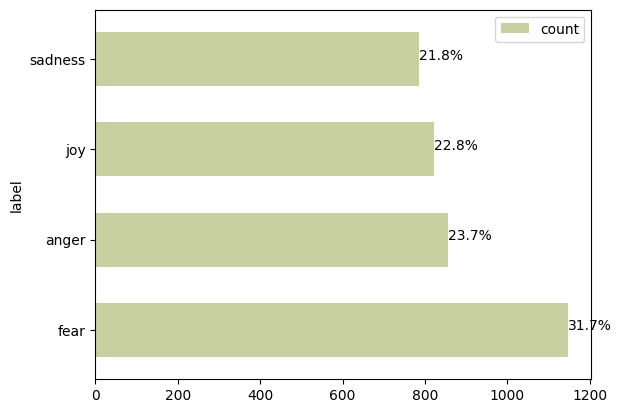

In [ ]:
# create an emotion dataframe for the graph used
emotion_data_train = data_train['label'].value_counts().to_frame()

# draw graph
ax = emotion_data_train.plot(kind='barh', color='#C8CFA0', width=0.6)

# count percentage
total = len(data_train['label'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

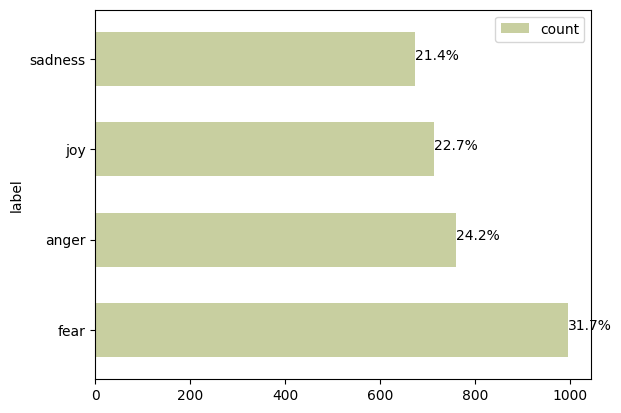

In [ ]:
# create an emotion dataframe for the graph used
emotion_data_test = data_test['label'].value_counts().to_frame()

# draw graph
ax_test = emotion_data_test.plot(kind='barh', color='#C8CFA0', width=0.6)

# count percentage
total_test = len(data_test['label'])

for p in ax_test.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total_test)
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height()/2
    ax_test.annotate(percentage, (x, y))